In [1]:
import os
import sys
import fitsio
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits
import matplotlib        as mpl

from   astropy.table     import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
from   poisson       import fillfactor_expectation, fillfactor_poisson
from   params        import fillfactor_threshold

In [4]:
survey  = 'gama'
field   = 'G15'
dryrun  = False
realz   = 0
version = 'GAMA4'

In [5]:
fpath   = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand    = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389797),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.5000003430527825),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 200),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.331028157097),
             ('NRAND8_PERR', 32.74646588804809),
             ('EXTNAME', 'RANDOMS')])

In [6]:
bound = Table.read(fpath, 'BOUNDARY')
bound

<Table length=540000>
     BOUND_RA           BOUND_DEC                Z                   V          BOUNDID FIELD  ...     CARTESIAN_Y         CARTESIAN_Z       ROTCARTESIAN_X      ROTCARTESIAN_Y      ROTCARTESIAN_Z  
     float64             float64              float64             float64        int64  bytes3 ...       float64             float64            float64             float64             float64      
------------------ -------------------- -------------------- ------------------ ------- ------ ... ------------------- ------------------- ------------------ ------------------- -------------------
             223.5  0.40063778486427637  0.05542830219275212  25994.50897891986       0    G15 ... -113.17357997955371  1.1496594200335213  163.5148911511191   17.18570750523301 -0.2772696396877312
             223.5   0.9719219102434473  0.02410020010177462 1183.1522362311023       1    G15 ... -49.500557425539405  1.2199675674428856  71.52540814262431   7.516790592071061  0.5958212412977677
             211.5   2.7601640018222424  0.11671435815635285  242630.6639378337       2    G15 ... -178.48960182467297  16.469340782843783 339.86725254324597  -35.70774170093898  13.503991329401643
             211.5     1.31087012077912  0.06861597879441203  49887.90023456125       3    G15 ... -106.04375280210274   4.644220222325806 201.87614138533132 -21.214585585636527  2.8826506707565827
             223.5   2.6954966166290735  0.18606407330666155  944648.5274568212       4    G15 ...  -369.5380787129258  25.274566716321353   534.101976965205  56.115334815364776  20.614491791263923
             211.5   1.9719885776508628  0.16846833788775528  708747.5327353809       5    G15 ...  -255.0456300433559  16.806840561915152  485.5811190337055  -51.02315981682304  12.569878311777279
             211.5   1.7307081189790998    0.069272976095836  51345.74326226799       6    G15 ...  -107.0244366433077   6.189152218588278  203.7561823221181 -21.410776315707338   4.411234626838994
             211.5 -0.09175657507305623  0.25276333780507176 2270179.3114881213       7    G15 ... -376.04985447618867 -1.1525910864317428  715.7346326622757  -75.23066292400273  -7.398756487750646
             223.5  -0.5835953732819252   0.1331589444573795 357214.58657202777       8    G15 ...  -267.6760740309231 -3.9609702217112845  386.6841248477313  40.647319942301294  -7.335662283394658
             211.5  -1.8839431549239436  0.16972617887509692  724192.9334838142       9    G15 ... -256.89552963127096 -16.172351083414497  488.8142831200254  -51.39324152456774  -20.43878452346027
             223.5  -0.3938154868387427  0.16374301114289821   652611.354654218      10    G15 ...  -327.0885699431962  -3.266105147104398 472.52498985674333   49.66926461427022  -7.389892629425438
               ...                  ...                  ...                ...     ...    ... ...                 ...                 ...                ...                 ...                 ...
222.88932654807275  -0.8380982010911231  0.27151303002263294 2779592.0929063964  539988    G15 ...  -523.9510505475281  -11.26190816159099  766.3240148926311   72.30694264456764 -17.949945359725486
    217.8299369993   0.7317525750286116 0.018824567924955588                0.0  539989    G15 ...  -34.48681065266453  0.7181766318416459  56.23292790990078  0.3237964007409424 0.22746665149149192
216.00645007166747   -1.054822831364793 0.018824567924955588                0.0  539990    G15 ...  -33.05322320803166 -1.0352227447708575 56.194515072030285 -1.4654660922512832 -1.5256642679812613
213.79349214991277  -1.4155490616562405  0.27151303002263294 2779592.0929063964  539991    G15 ...  -428.1092163398311 -19.020122274083864  767.8968107218603  -49.75789192735874 -25.722180473751504
213.57975644173825   1.5754841720463562 0.018824567924955588                0.0  539992    G15 ... -31.091288843893153  1.5461019616041058  56.09289053292299 -3.8431625329772956  1.0566455949886695
212.60107890087667

In [7]:
fpath   = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version, oversample=4)
rand    = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 5559185),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 2.000000292916075),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 4),
             ('SEED', 400),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_x4_0.fits'),
             ('NRAND8', 4289.321797906826),
             ('NRAND8_PERR', 65.49291410455658)])

In [8]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389797),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.5000003430527825),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 200),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.331028157097),
             ('NRAND8_PERR', 32.74646588804809),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('COLLATE', 'TRUE'),
             ('NREALZ', 12)])

In [9]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389797),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.5000003430527825),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 200),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.331028157097),
             ('NRAND8_PERR', 32.74646588804809),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('COLLATE', 'TRUE'),
             ('NREALZ', 12)])

In [10]:
rand

<Table length=1389797>
    RANDOM_RA            RANDOM_DEC               Z                  V           RANDID FIELD  ...     FILLFACTOR_STD       RAND_N8_STD         BOUND_DIST     BOUNDID FILLFACTOR_POISSON
     float64              float64              float64            float64        int64  bytes3 ...        float64             float64            float64        int64       float64      
------------------ --------------------- ------------------- ------------------ ------- ------ ... --------------------- ------------------ ------------------ ------- ------------------
 212.4258891654097    2.4958538526262792  0.2542534308883599 2309416.5548973344   84907    G15 ... 0.0042418097103590815 18.194486853216056  6.395641002288275  465546 0.9710548340530787
 215.5277323668151     2.486205154258306 0.21355454394362086 1405044.0347215496  195894    G15 ...  0.005287189912731708 22.678458942353206  5.505190231242851  433994 0.9326649266446343
215.26808160887134   -0.6979514963072986  0.2713031675782253 2774616.4632127807 1012372    G15 ...  0.002932220713370392  12.57723822213352  0.564580894795816  425841  0.551000083001468
221.93128316563013    0.8826238337136832  0.2450937931170354 2081118.1811746166  456636    G15 ...  0.003474003947126674  14.90112085642479 19.846794608170224  425197 0.9943879710963696
213.78941813524472    2.1962410028270676 0.22947833075301302 1725557.9427307113  861331    G15 ... 0.0033949164183472713 14.561888995288735  9.248203763496493  517905 1.0012072309649749
219.81516775670744   0.06645490485572812 0.20583124561210886 1264293.3506275702  984645    G15 ... 0.0032748101105299424 14.046714391101757 21.352701290976402  488764  0.996039358813838
218.56408620630907   0.09475366799241909 0.24043808120877663 1970725.3371232192 1378755    G15 ...  0.004264174571671428 18.290416940350266 25.115169340677532  381236  0.999497558975125
 217.6771649410949   -0.5128945339244082 0.08469912070009217  94958.90740342303  561029    G15 ...  0.005145703236853804 22.071577059396752  6.494235716601277  499191 0.9764364152029469
211.57645504370853   -0.5434045719651825 0.26076178811281076 2480740.4302858193  608871    G15 ... 0.0033477772527344823 14.359693944690646 0.9909439592541087  535531  0.597510932361699
 214.5698085053606    1.6032915695024117  0.2374994101922459  1902976.636778914 1103351    G15 ... 0.0026805309388659797 11.497659786041487 16.538764069529165  515412  1.007793353744055
221.10907410831592   -1.0349538721020295   0.259709372854498 2452517.9653997114  763313    G15 ...  0.005820380612696682  24.96548543415415 12.454067743324542  415908 1.0032277524075244
               ...                   ...                 ...                ...     ...    ... ...                   ...                ...                ...     ...                ...
216.22394718462974   -1.9035440311063867 0.26846539690426413 2693489.2605196857  787557    G15 ... 0.0026736222516377506 11.468026203318512 1.6076695855506502  511713 0.6207857851326083
216.49285916805727 -0.056426973447460296  0.2167429865901549 1465914.0683829316 1038025    G15 ... 0.0033192055888911034 14.237140884164756  21.09513320013476  442621 1.0011489466925936
213.28644813854967    2.1589073748370424   0.168941466936645  715615.8043232333  841577    G15 ... 0.0029289202725465177 12.563081569364998  7.212669913182578  403508 0.9947571048214509
220.48421528927227    -1.659531196531259 0.18486355004246358  928249.3706209909 1076040    G15 ...  0.004297353591759986  18.43273243444932  3.249485276005867  117732 0.7878285097772478
213.80023728564478    1.3591939464777003 0.18339441345481824  907137.0309256797  113742    G15 ...  0.004072997027258348 17.470394931828935 15.176960851160043  516606 1.0075213604729425
222.73026523528452    1.7347069738183158 0.20462374660182575 1243132.7768547575 1120601    G15 ...  0.003802152320119545 16.308654825650773  7.906619682909945  122018 1.0029557591364122
219.70037008251862   -0.8460508785906392   0.137601267083992   394286.2

In [11]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.01882456792495559),
             ('ZMAX', 0.2715130300226329),
             ('DZ', 0.0001),
             ('NRAND', 1389797),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779592.092906396),
             ('RAND_DENS', 0.5000003430527825),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 200),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G15_0.fits'),
             ('NRAND8', 1072.331028157097),
             ('NRAND8_PERR', 32.74646588804809),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('COLLATE', 'TRUE'),
             ('NREALZ', 12),
             ('GOLD_NGAL', 121975),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
 

Text(0, 0.5, 'DEC [deg.]')

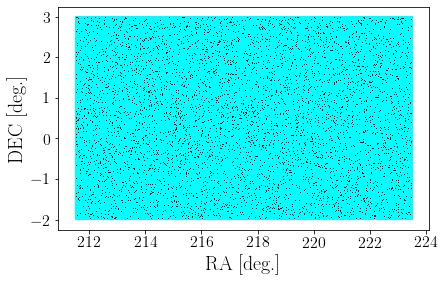

In [12]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

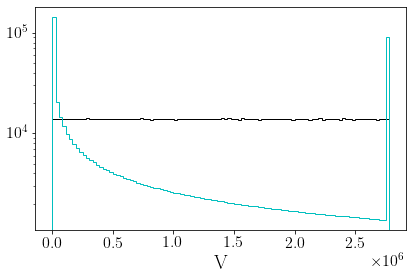

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

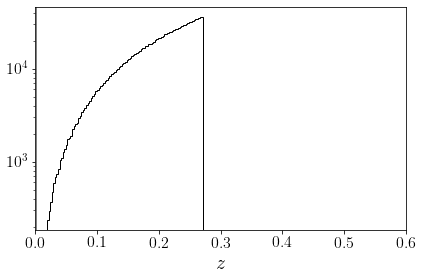

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [15]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

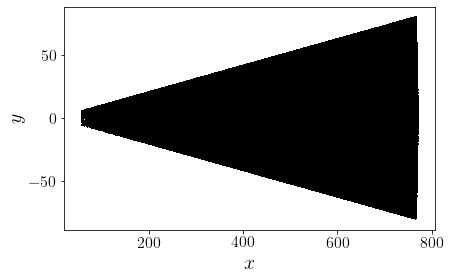

In [16]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

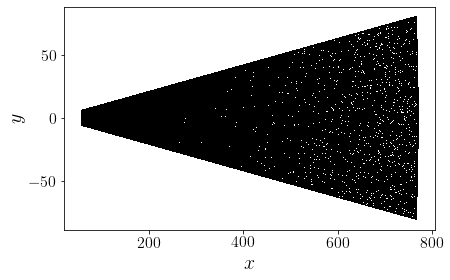

In [17]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

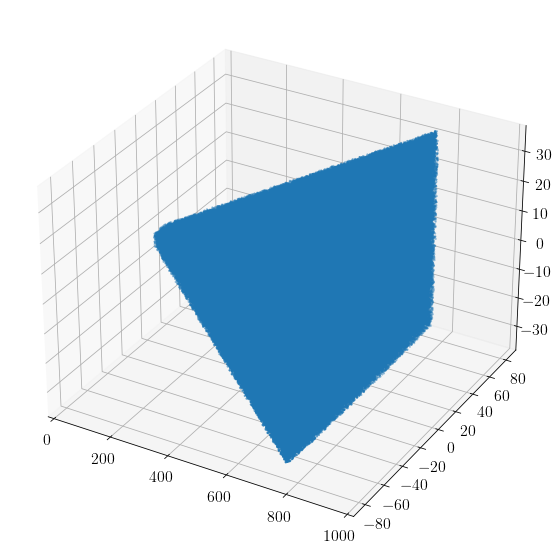

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

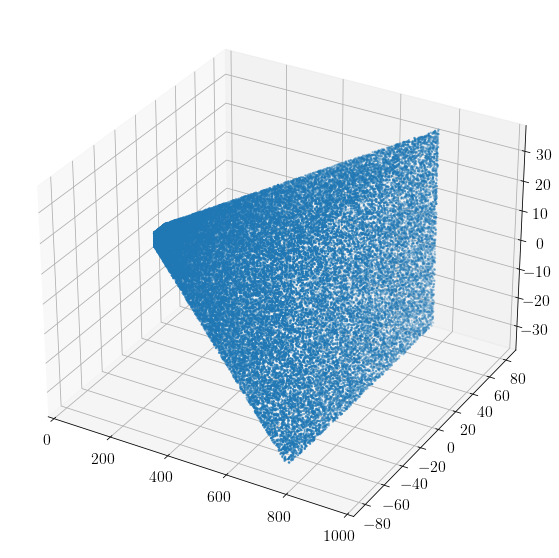

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000021585886283

In [21]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max(), np.median(rand['RAND_N8'])

(522.0, 4372.916666666667, 4269.333333333333)

In [22]:
rand.meta['NRAND8'], rand.meta['RAND_DENS'], rand.meta['VOL8'], rand.meta['NREALZ']

(1072.331028157097, 0.5000003430527825, 2144.660584850632, 12)

(50.0, 8000.0)

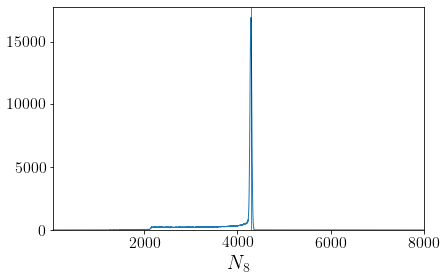

In [23]:
oversample = 4
_          = pl.hist(rand['RAND_N8'], bins=np.arange(0, 8000, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'] * oversample, c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 8000.)

In [24]:
rand.meta['RAND_DENS'] * rand.meta['VOL8']

1072.331028157097

In [25]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

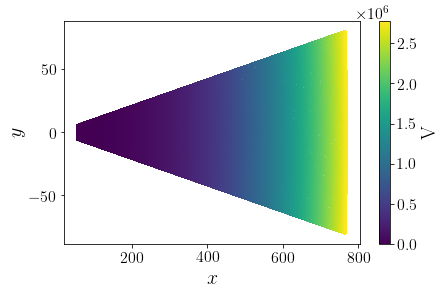

In [26]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

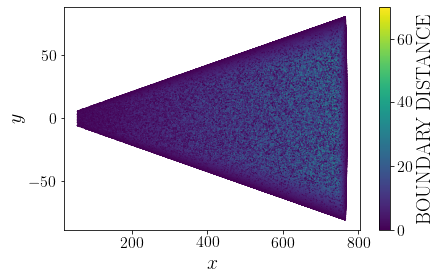

In [27]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

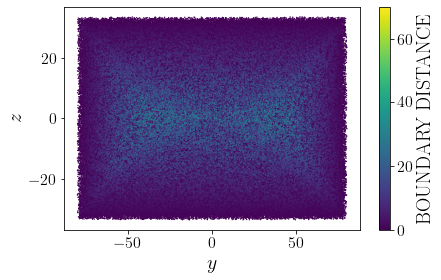

In [28]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [29]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

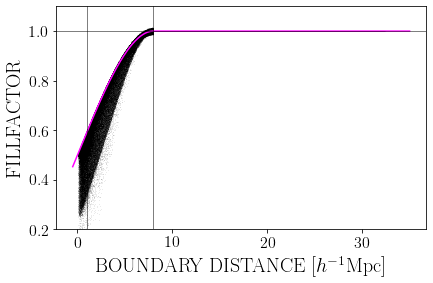

In [30]:
bds = np.arange(-0.5, 35., 0.01)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

pl.plot(bds, fillfactor_expectation(bds), lw=1.5, c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'FILLFACTOR')

pl.axhline(1.00, c='k', lw=0.5)

pl.axvline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

(0.2, 1.1)

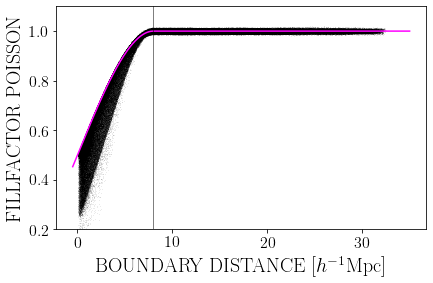

In [31]:
pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR_POISSON'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

bds = np.arange(-0.5, 35., 0.01)
pl.plot(bds, fillfactor_expectation(bds), lw=1.5, c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'FILLFACTOR POISSON')

pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

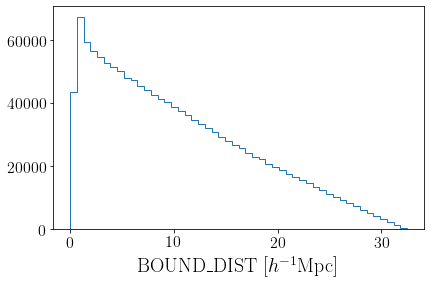

In [33]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')

pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [34]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_ddp_n8.fits'

In [45]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version, prefix='randoms_ddp1')

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0190299991518259),
             ('ZMAX', 0.2715100049972534),
             ('DZ', 0.0001),
             ('NRAND', 1389734),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('VOL', 2779468.970915499),
             ('RAND_DENS', 2.999998952049285),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 200),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_G15_0.fits'),
             ('NRAND8', 6433.979507053304),
             ('NRAND8_PERR', 80.2120907784687),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('COLLATE', 'TRUE'),
             ('NREALZ', 6),
             ('GOLD_NGAL', 121975),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLO

In [46]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos

array([[710.37548447,  26.1747787 , -30.9218789 ],
       [655.43678288, -14.31374259,  22.06355657],
       [681.40457553,  50.50880365,  -7.9426827 ],
       ...,
       [512.83770416,  44.77416428,  16.16877421],
       [654.31548573,  64.12582973, -24.7718922 ],
       [747.17871426, -27.62763895,  -9.104087  ]])

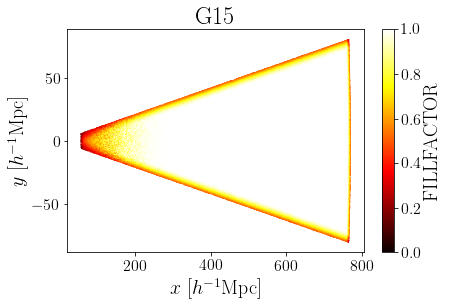

In [47]:
fills     = rand['FILLFACTOR'].data
pos_slice = pos

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

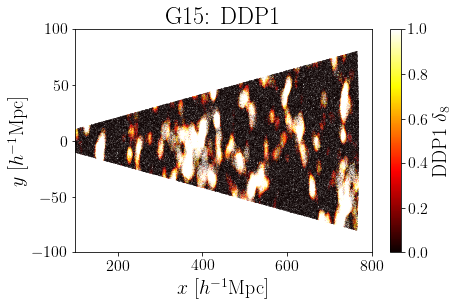

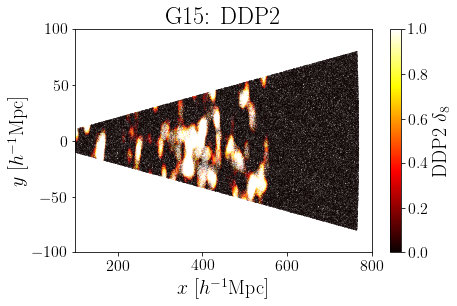

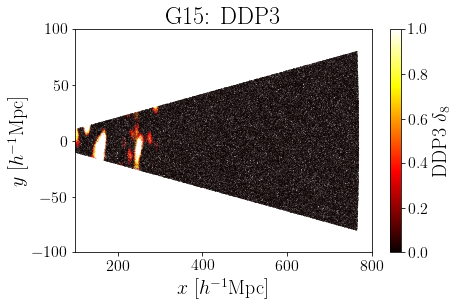

In [48]:
for idx in np.arange(1, 4, 1):
    fills     = rand['DDP{}_DELTA8'.format(idx)].data
    pos_slice = pos

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [49]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

-28.47909572187601 28.436586804060862


Text(0.5, 1.0, 'G15:  DDP1')

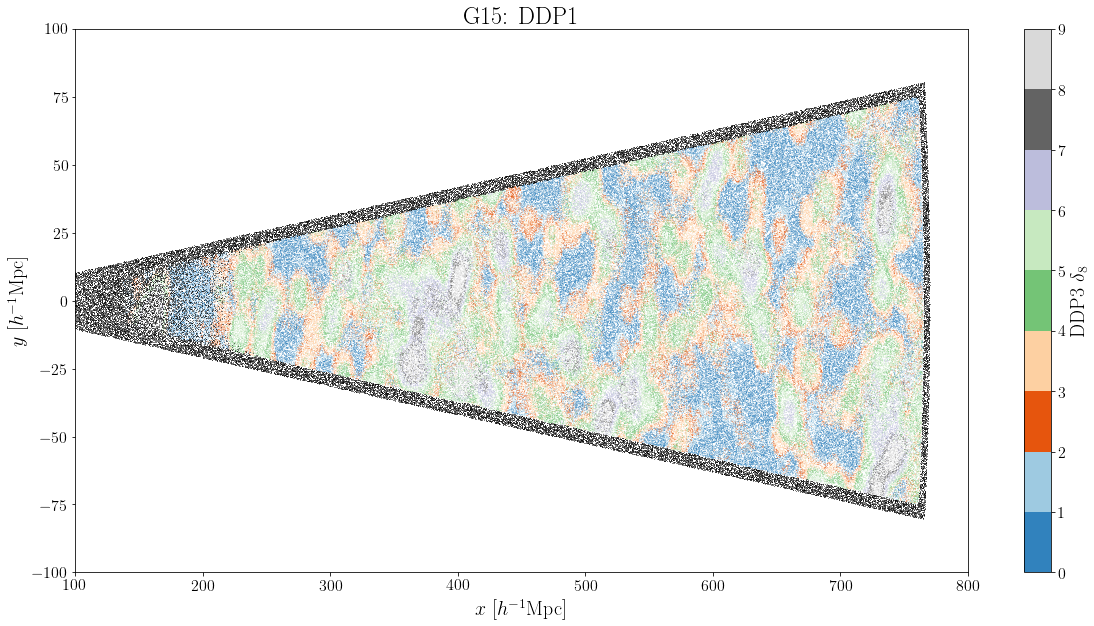

In [51]:
slice_limit = 5.

fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > fillfactor_threshold

fills     = rand['DDP1_DELTA8_TIER'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < slice_limit]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < slice_limit]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2,\
           cmap=cmap,\
           norm=norm)

isin      = rand['FILLFACTOR'].data < fillfactor_threshold
pos_slice = pos[isin]

ax.scatter(pos_slice[:,0][np.abs(pos_slice[:,2]) < slice_limit],\
           pos_slice[:,1][np.abs(pos_slice[:,2]) < slice_limit],\
           c='k',\
           marker='.',\
           lw=0.0,\
           s=2,\
           alpha=0.75)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='DDP{}  $\delta_8$'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-33.544355919841095 33.58235851643307


Text(0.5, 1.0, 'G15:  DDP1')

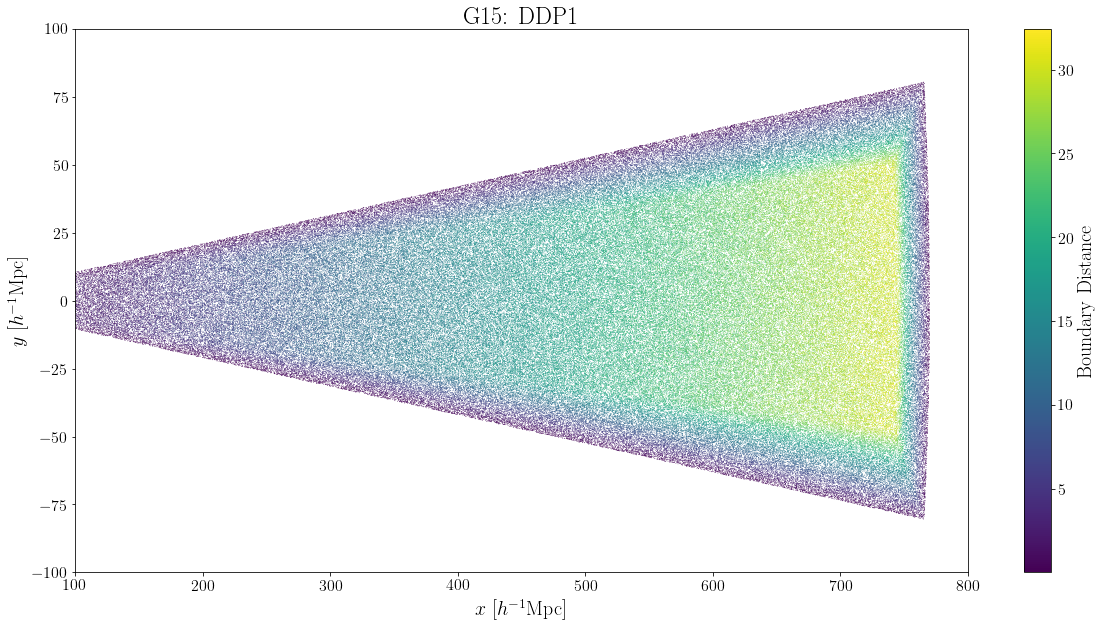

In [54]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

fills     = rand['BOUND_DIST'].data
pos_slice = pos

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Boundary Distance'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-33.544355919841095 33.58235851643307


Text(0.5, 1.0, 'G15:  DDP1')

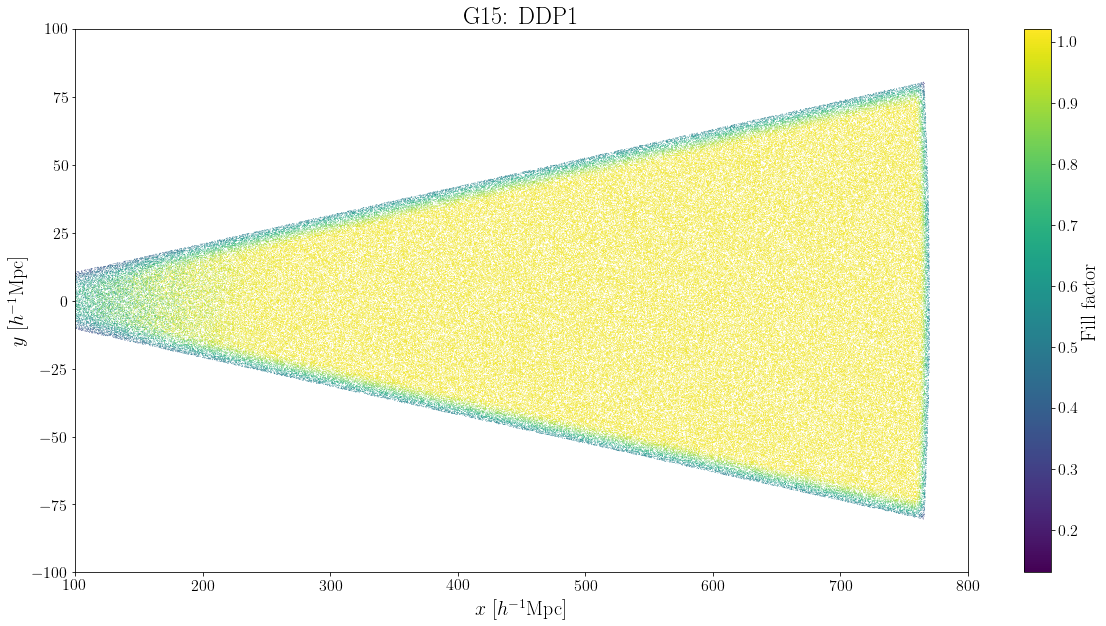

In [39]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Fill factor'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

Text(0, 0.5, 'DDP1 $\\delta_8$')

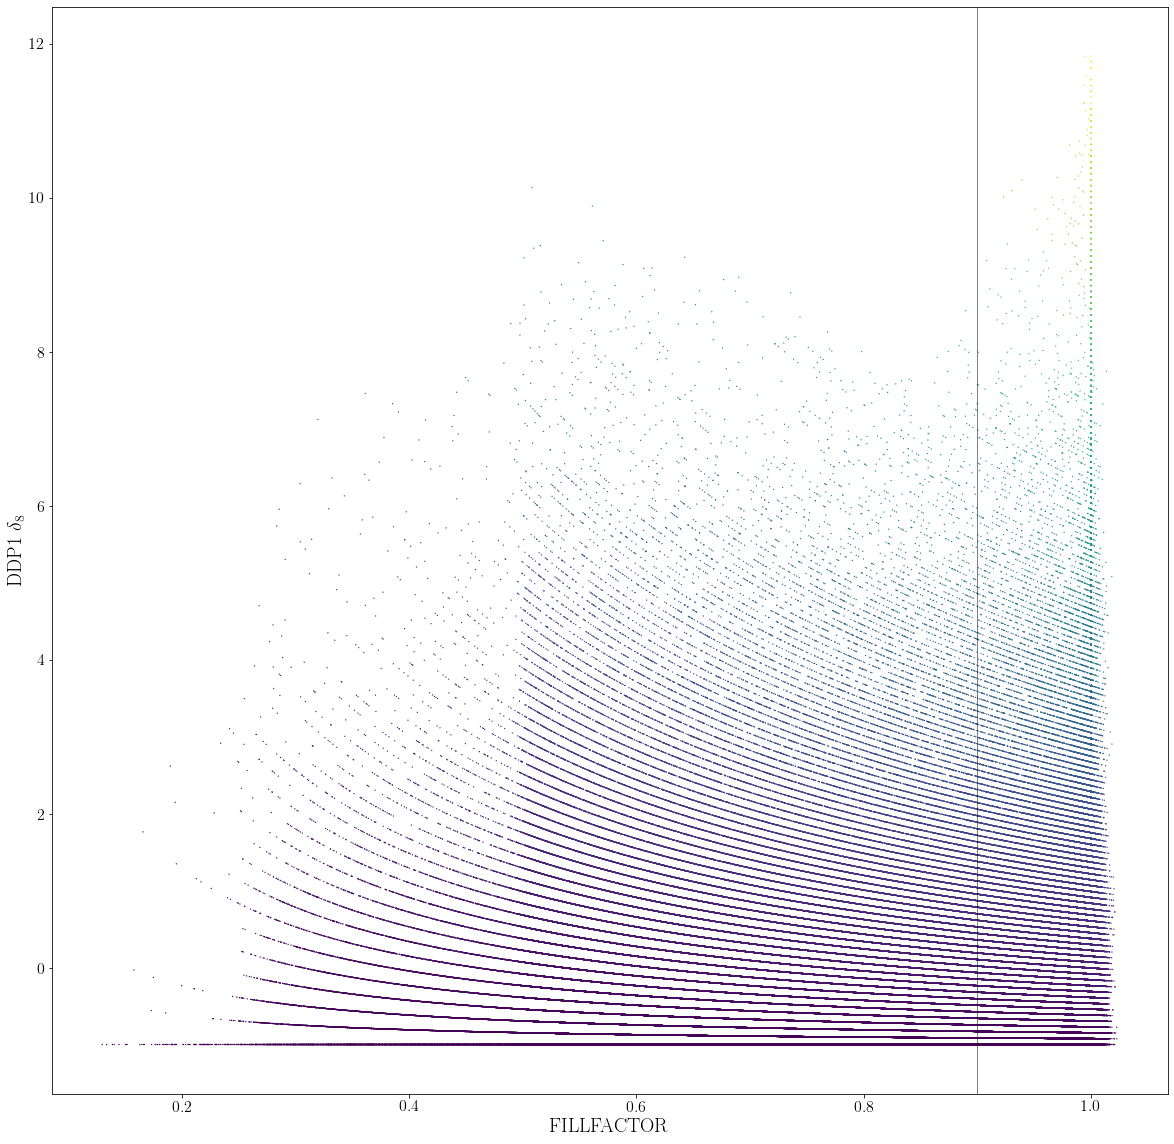

In [56]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

ax.axvline(fillfactor_threshold, c='k', lw=0.5)

ax.scatter(rand['FILLFACTOR'], rand['DDP1_DELTA8'], marker='.', lw=0.0, c=rand['DDP1_N8'], s=7)

ax.set_xlabel('FILLFACTOR')
ax.set_ylabel('DDP1 $\delta_8$')

Text(0, 0.5, 'DDP2 $\\delta_8$')

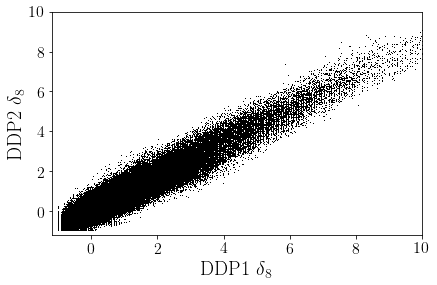

In [57]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

# Done.